In [3]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits import mplot3d

In [4]:
delivery = pd.read_csv('/home/abin/Desktop/delivery.csv')
delivery.head()

,n.prod,distance,delTime
0,7,560,16.68
1,3,220,11.50
2,3,340,12.03
3,4,80,14.88
4,6,150,13.75


In [5]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   n.prod    25 non-null     int64  
 1   distance  25 non-null     int64  
 2   delTime   25 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 728.0 bytes


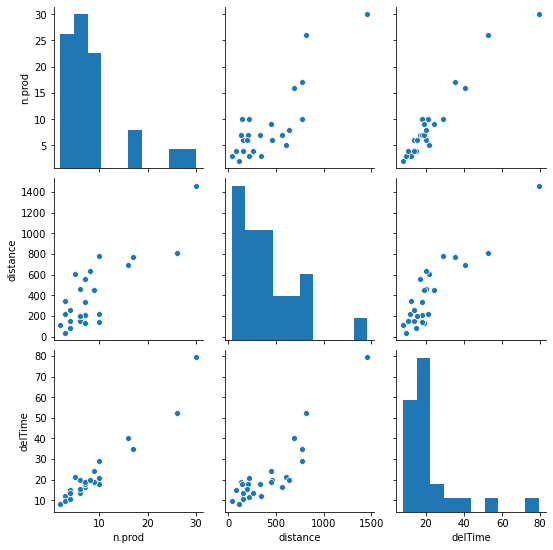

In [6]:
sns.pairplot(delivery)

We can observe, that the scatter plot matrix for the delivery time dataset shown above suggests a linear relationship among its variables – n.prod, distance and delTime.

In [7]:
model = LinearRegression()

# selecting the predictors and targets
x = delivery[['n.prod', 'distance']]
y = delivery['delTime']

# fitting the model
model.fit(x, y)

print("Intercept:",model.intercept_ ,"\nCoefficients:",model.coef_)

Intercept: 2.3412311451922108 
Coefficients: [1.61590721 0.01438483]


Therefore, the best fit model to predict the delivery time based on n.prod and distance can be expressed as shown below.

### Expected delTime = 2.3413 + 1.615*(n.prod) + 0.014*(distance) + error

# Visualizing the Multi-variate Linear Regression

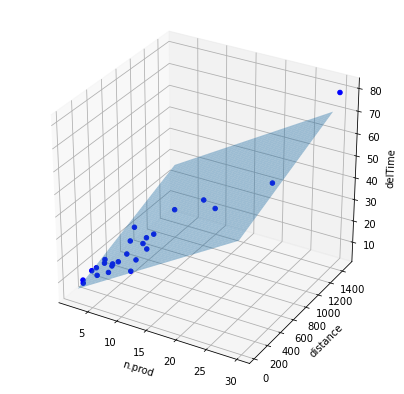

In [8]:
#Setting up the plot area
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111,projection='3d')#projection = '3d' is used to have 3D axes
#3d scatterplot of the delivery dataset
ax.scatter(xs = delivery["n.prod"], ys = delivery["distance"], zs=delivery["delTime"],
           c='blue',
           alpha=1,
           marker='o')
ax.set_xlabel("n.prod")
ax.set_ylabel("distance")
ax.set_zlabel("delTime")
#Creating a mesh of x and y values to plot the regression plane
x_surf = np.arange(delivery["n.prod"].min(), delivery["n.prod"].max(), 1) 
y_surf = np.arange(delivery["distance"].min(), delivery["distance"].max(), 1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
X_mesh = pd.core.frame.DataFrame({'n.prod': x_surf.ravel(), 'distance': y_surf.ravel()})
#Predicting the output of model for every point in the mesh
out = model.predict(X_mesh)
#Plotting the regression plane
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                alpha = 0.4) # apha => transparency of the surface


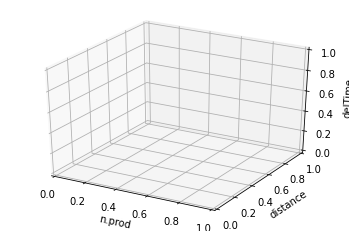

In [14]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.set_xlabel('n.prod')
ax.set_ylabel('distance')
ax.set_zlabel('delTime')


plt.show()

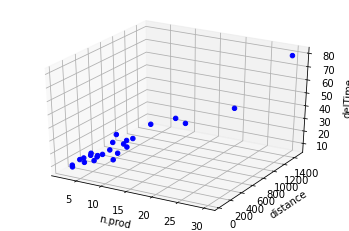

In [15]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.set_xlabel('n.prod')
ax.set_ylabel('distance')
ax.set_zlabel('delTime')
ax.scatter(xs = delivery["n.prod"], ys = delivery["distance"], zs=delivery["delTime"],
           c='blue',
           alpha=1,
           marker='o')


plt.show()

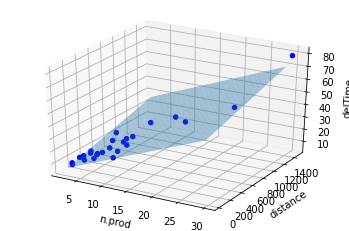

In [19]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.set_xlabel('n.prod')
ax.set_ylabel('distance')
ax.set_zlabel('delTime')
ax.scatter(xs = delivery["n.prod"], ys = delivery["distance"], zs=delivery["delTime"],
           c='blue',
           alpha=1,
           marker='o')


x_surf = np.arange(delivery["n.prod"].min(), delivery["n.prod"].max(), 1) 
y_surf = np.arange(delivery["distance"].min(), delivery["distance"].max(), 1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
X_mesh = pd.core.frame.DataFrame({'n.prod': x_surf.ravel(), 'distance': y_surf.ravel()})
#Predicting the output of model for every point in the mesh
out = model.predict(X_mesh)
#Plotting the regression plane
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                alpha = 0.4) # apha => transparency of the surface



plt.show()